# Deep Learning Project

## Cotton Plant Image Classification

 - This Project is about buliding a mobilnet model to classify Images of Disease and non Disease cotton plant.

  - Dataset contains 4 classes

    - Diseased cotton leaf
    - Diseased cotton plant
    - Fresh cotton leaf
    - Fresh cotton plant
 
## Image Classification Using Transfer Learning-Keras Mobilnets


In [1]:
# Importing Libraries

import keras
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
# importing Keras Libraries
from keras.models import Model
from keras.layers import Dense,Flatten,Activation,BatchNormalization,Conv2D,MaxPool2D
from keras.optimizers import Adam
from keras.metrics import CategoricalCrossentropy
from keras.preprocessing import image
from keras_preprocessing.image import ImageDataGenerator

/home/niraj/snap/jupyter/common/lib/python3.7/site-packages/joblib/_multiprocessing_helpers.py:45: UserWarning: [Errno 13] Permission denied.  joblib will operate in serial mode
  warnings.warn('%s.  joblib will operate in serial mode' % (e,))


In [2]:
# Specify image height and width
img_width, img_height = 224,224
# specify path
train_dir = 'Data/train'
val_dir = 'Data/val'
test_dir = 'Data/test'

In [3]:
# create batches of data from the train, valid, and test directories using Keras-ImageDataGenerator 

train_sets = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input)\
             .flow_from_directory(directory=train_dir,target_size=[224,224],batch_size=32)

val_sets = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input)\
             .flow_from_directory(directory=val_dir,target_size=[224,224],batch_size=32)

test_sets = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input)\
             .flow_from_directory(directory=test_dir,target_size=[224,224],batch_size=32,shuffle=False)


Found 1951 images belonging to 4 classes.
Found 253 images belonging to 4 classes.
Found 106 images belonging to 4 classes.


In [4]:
# Class indices
train_sets.class_indices

{'diseased cotton leaf': 0,
 'diseased cotton plant': 1,
 'fresh cotton leaf': 2,
 'fresh cotton plant': 3}

In [5]:
# Creating Function for plotting images
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

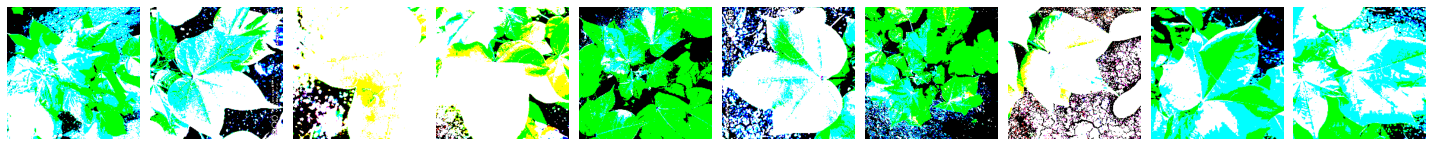

[[0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]]


In [6]:
# train labels
imgs,labels = next(train_sets)
# plotting train images
plotImages(imgs)
print(labels)

## Model

In [7]:
# Creating Model using Mobilenets
from keras.applications.mobilenet import MobileNet
from tensorflow.python.keras.applications import mobilenet

In [8]:
# importing mobilnets models
mobilenets= keras.applications.mobilenet.MobileNet()

In [9]:
# cheaking type of mobilenets 
type(mobilenets)

tensorflow.python.keras.engine.functional.Functional

In [10]:
# Removing Last layers
x = mobilenets.layers[-2].output

In [11]:
# setting output layers
output = Dense(units=4, activation='softmax')(x)

In [12]:
# Adding output layer
model = Model(inputs=mobilenets.input, outputs=output)

In [13]:
# training the last 20 layers
for layer in model.layers[:-20]:
    layer.trainable = False

In [14]:
# Model summary
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 112, 112, 32)      0     

In [15]:
# compiling modeld
model.compile(optimizer=Adam(learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [16]:
# fitting Model
r = model.fit(x=train_sets,validation_data=val_sets,
         steps_per_epoch=len(train_sets),
         validation_steps=len(val_sets),
         epochs=10,
          verbose=2)

Epoch 1/10
61/61 - 231s - loss: 0.8650 - accuracy: 0.7663 - val_loss: 18.7060 - val_accuracy: 0.2609
Epoch 2/10
61/61 - 216s - loss: 0.1792 - accuracy: 0.9364 - val_loss: 4.0761 - val_accuracy: 0.4308
Epoch 3/10
61/61 - 213s - loss: 0.0673 - accuracy: 0.9759 - val_loss: 1.3068 - val_accuracy: 0.6838
Epoch 4/10
61/61 - 213s - loss: 0.0349 - accuracy: 0.9928 - val_loss: 1.0029 - val_accuracy: 0.7628
Epoch 5/10
61/61 - 215s - loss: 0.0241 - accuracy: 0.9933 - val_loss: 0.3992 - val_accuracy: 0.8775
Epoch 6/10
61/61 - 211s - loss: 0.0106 - accuracy: 0.9985 - val_loss: 0.3873 - val_accuracy: 0.8656
Epoch 7/10
61/61 - 215s - loss: 0.0125 - accuracy: 0.9969 - val_loss: 0.2995 - val_accuracy: 0.8893
Epoch 8/10
61/61 - 152s - loss: 0.0092 - accuracy: 0.9990 - val_loss: 0.4354 - val_accuracy: 0.8735
Epoch 9/10
61/61 - 106s - loss: 0.0076 - accuracy: 0.9985 - val_loss: 0.2845 - val_accuracy: 0.9130
Epoch 10/10
61/61 - 105s - loss: 0.0079 - accuracy: 0.9979 - val_loss: 0.4611 - val_accuracy: 0.869

## Plotting Model

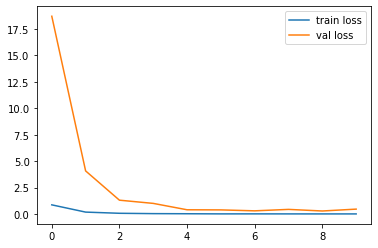

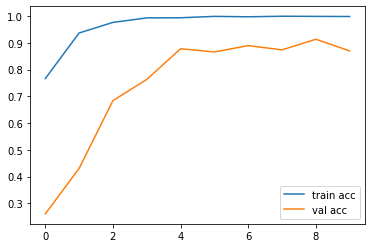

<Figure size 432x288 with 0 Axes>

In [17]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [20]:
# test labels
test_labels = test_sets.classes

In [21]:
# predictions
prediction =  model.predict(x=test_sets,steps=len(test_sets),verbose=0)

In [22]:
# creating Confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true=test_labels, y_pred=prediction.argmax(axis=1))

In [23]:
# plot confusion matrix (function from sklearn)
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[22  0  1  2]
 [ 0 22  0  6]
 [ 0  0 25  1]
 [ 0  0  0 27]]


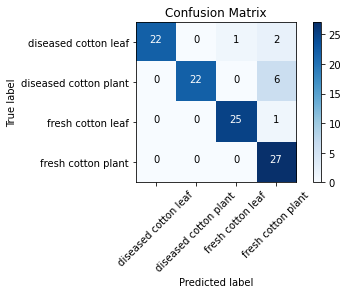

In [24]:
# plottin confusion matrix
import itertools
cm_plot_labels = test_sets.class_indices
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

## Validating images

In [25]:
# loading Model
model = tf.keras.models.load_model('mobil.h5')

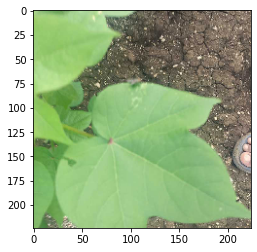

In [27]:
# importing Image
path = 'd (50)_iaip.jpg'
img = image.load_img(path,target_size=[224,224])
plt.imshow(img)
plt.show()

In [28]:
from tensorflow.keras.applications.resnet50 import preprocess_input
# Converting Image to array
X= image.img_to_array(img)
# prpocessing image
X=np.expand_dims(X,axis=0)
img_data=preprocess_input(X)
img_data.shape

(1, 224, 224, 3)

In [29]:
# predicting Image
model.predict(img_data)

array([[6.7298446e-05, 2.1324974e-10, 9.9993265e-01, 1.8469665e-10]],
      dtype=float32)

In [30]:
# Get class of prdiction
a=np.argmax(model.predict(img_data), axis=1)
a

array([2])

In [31]:
# function for testing Images
def test_img(img_path):
    img = image.load_img(img_path,target_size=[224,224])
    X= image.img_to_array(img)
    X=np.expand_dims(X,axis=0)
    img_data=preprocess_input(X)
    a=np.argmax(model.predict(img_data), axis=1)
    if(a==0):
        print('Disease Leaf')
    elif(a==1):
        print('Disease Plant')
    elif(a==2):
        print('Fresh Leaf')
    else:
        print('Fresh Plant')

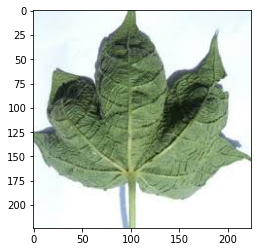

Disease Leaf


In [34]:
# Testing image
path = 'curling_leaf.jpg'
img = image.load_img(path,target_size=[224,224])
plt.imshow(img)
plt.show()
test_img(path)